In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import joblib

dataset_paths = ut.images_paths("Images/DatasetCropped/")
base_cards_paths = ut.images_paths("Images/Cards/")




In [2]:
labels = []
hu_moments = []
samples=[]
for path in dataset_paths:
    samples.append(ut.label_properties(path))
    image = cv2.imread(path)
    contours = ut.preprocess_image(image)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
print(df_raw)

    value seed label index                                            moments
0       A    C    AC     3  [0.0016040688448177385, 7.189343057866794e-07,...
1       8    S     8     4  [0.0015126063883207583, 7.747059744412217e-07,...
2       R    S     R     3  [0.0016767928594886056, 7.158684820286789e-07,...
3       A    O    AO     4  [0.0011245283085663178, 4.746133341019041e-07,...
4       3    C     C     4  [0.0010442416559300369, 3.2259098893490924e-07...
..    ...  ...   ...   ...                                                ...
184     6    B     B     1  [0.0010610594492096853, 1.978958652754414e-07,...
185     5    O     O     2  [0.001019816873955219, 1.7035071818876414e-08,...
186     2    S    2S     5  [0.0010502997323637822, 1.5177165264288702e-07...
187     4    C     C     4  [0.0009560788619297686, 1.2229982225283888e-07...
188     4    C     C     1  [0.0009945094603666768, 2.177063671706625e-07,...

[189 rows x 5 columns]


In [5]:
labels = []
hu_moments = []
samples=[]
for path in base_cards_paths:
    print(path)
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    contours = ut.preprocess_image(image)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())

df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
print(df_base)

Images/Cards/3O.jpg
Images/Cards/9S.jpg
Images/Cards/5B.jpg
Images/Cards/7S.jpg
Images/Cards/2O.jpg
Images/Cards/4O.jpg
Images/Cards/4C.jpg
Images/Cards/RO.jpg
Images/Cards/6O.jpg
Images/Cards/7O.jpg
Images/Cards/3B.jpg
Images/Cards/9O.jpg
Images/Cards/RS.jpg
Images/Cards/7C.jpg
Images/Cards/8O.jpg
Images/Cards/5S.jpg
Images/Cards/5C.jpg
Images/Cards/RB.jpg
Images/Cards/6B.jpg
Images/Cards/4S.jpg
Images/Cards/6C.jpg
Images/Cards/AB.jpg
Images/Cards/7B.jpg
Images/Cards/AS.jpg
Images/Cards/2S.jpg
Images/Cards/AO.jpg
Images/Cards/2B.jpg
Images/Cards/8B.jpg
Images/Cards/9C.jpg
Images/Cards/3C.jpg
Images/Cards/2C.jpg
Images/Cards/8S.jpg
Images/Cards/AC.jpg
Images/Cards/4B.jpg
Images/Cards/6S.jpg
Images/Cards/5O.jpg
Images/Cards/RC.jpg
Images/Cards/3S.jpg
Images/Cards/8C.jpg
Images/Cards/9B.jpg
   value seed label                                            moments
0      3    O     O  [0.0009176596398662628, 1.9943042232566546e-07...
1      9    S     9  [0.0013229537560282183, 3.65490278892

In [6]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_base["moments"].tolist())
Scaled_data=scaling.transform(df_base["moments"].tolist())
principal=PCA(n_components=7)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(40, 7)


In [12]:
#X_train, X_test, y_train, y_test = train_test_split(x,df_raw["label"].tolist(), test_size=0.2, random_state=42)
X_test = x
X_train = scaling.transform(df_raw["moments"].to_list())
y_test = df_base["label"].tolist()
y_train = df_raw["label"].tolist()

print(X_train)
print("----------")
print(y_train)

[[ 2.87022010e+00  3.29934018e+00 -4.54058262e-01 ... -2.96708731e-01
   5.56510675e-01 -3.97911133e-03]
 [ 2.32836628e+00  3.76225693e+00  7.03220912e+00 ...  6.56795997e-01
   5.69708131e-01 -3.35442901e+00]
 [ 3.30106121e+00  3.27389319e+00  1.82220409e+00 ...  3.16409877e-02
   6.87861242e-01 -4.14052041e+00]
 ...
 [-4.10491166e-01 -1.40823085e+00 -6.21619231e-01 ... -4.53860876e-01
  -5.40035059e-01  1.59794240e-02]
 [-9.68686747e-01 -1.65285333e+00  4.39839937e-01 ... -4.25784543e-01
  -4.47737201e-01  2.05775180e-02]
 [-7.41011179e-01 -8.60958648e-01 -7.86877353e-01 ... -4.53924773e-01
  -5.44435277e-01  1.56425042e-02]]
----------
['AC', '8', 'R', 'AO', 'C', 'B', 'B', 'R', 'AC', 'O', 'S', 'O', '8', 'R', '9', '9', 'S', 'S', 'O', '9', 'C', '8', 'AC', '9', 'C', 'AO', 'B', 'B', 'C', '9', '8', '2S', 'S', '9', 'R', 'B', '8', '8', '8', 'C', 'O', 'S', 'R', 'R', '9', 'S', 'B', 'O', 'R', 'AC', 'C', 'C', 'R', 'S', 'R', 'S', 'B', 'B', '8', 'S', '2C', 'C', '8', 'O', 'O', '9', 'C', '2B', 'C'

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_svm.fit(X_train, y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Estimator:", grid_svm.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

In [14]:
test_image = cv2.imread('Images/Cards/2C.jpg')
contours = ut.preprocess_image(test_image)
moments = cv2.moments(contours[0])
hu_moment=scaling.transform([cv2.HuMoments(moments).flatten()])

print(grid_svm.predict(principal.transform(hu_moment)))

['B']


In [15]:
predictions = grid_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.125
Classification Report:
              precision    recall  f1-score   support

          2B       0.00      0.00      0.00         1
          2C       0.00      0.00      0.00         1
          2S       0.00      0.00      0.00         1
          3B       0.00      0.00      0.00         1
          3S       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          AB       0.00      0.00      0.00         1
          AC       0.00      0.00      0.00         1
          AO       0.00      0.00      0.00         1
          AS       0.00      0.00      0.00         1
           B       0.05      0.25      0.09         4
           C       0.00      0.00      0.00         5
           O       0.33      0.67      0.44         6
           R       0.00      0.00      0.00         4
           S       0.00      0.00      0.00         4

    accuracy                           0.

/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

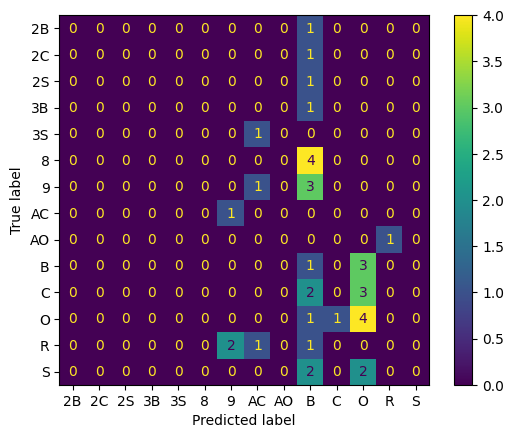

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=grid_svm.classes_)
disp.plot()